# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss, hinge_loss

np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

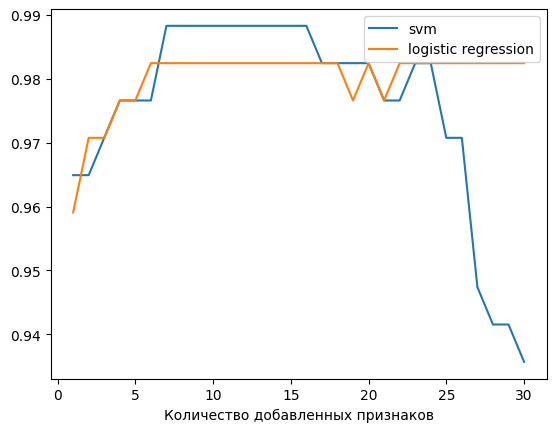

In [2]:
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

features = np.arange(X_train.shape[1])

x = []
y_svm = []
y_reg = []

features_svm = []
features_reg = []

def score_model (model, _features):
    features = np.array(sorted(_features))
    _X_train = X_train[:,features]
    _X_test = X_test[:,features]
    model.fit(_X_train, y_train)
    prediction = model.predict(_X_test)
    return accuracy_score(y_test, prediction)


for i in range(len(features)):
    best_feature_svm = -1
    score_svm = 0.0

    best_feature_reg = -1
    score_reg = 0.0

    for v in features:
        if v in features_svm:
            continue
        _features = features_svm.copy()
        _features.append(v)
        model = LinearSVC(random_state=123)
        score = score_model(model, _features)

        if best_feature_svm == -1 or score_svm < score:
            best_feature_svm = v
            score_svm = score

    model_svm = LinearSVC(random_state=123)
    features_svm.append(best_feature_svm)
    y_svm.append(score_model(model_svm, features_svm))

    for v in features:
        if v in features_reg:
            continue
        _features = features_reg.copy()
        _features.append(v)
        model = LogisticRegression(max_iter=(int)(5e2))
        score = score_model(model, _features)

        if best_feature_reg == -1 or score_reg < score:
            best_feature_reg = v
            score_reg = score

    model_reg = LogisticRegression(max_iter=(int)(5e2))
    features_reg.append(best_feature_reg)
    y_reg.append(score_model(model_reg, features_reg))

    x.append(i + 1)

    clear_output(True)
    # print(features_reg, features_svm)
    plt.plot(x, y_svm, label="svm")
    plt.plot(x, y_reg, label="logistic regression")
    plt.xlabel("Количество добавленных признаков")

    plt.legend()

    plt.show()

# Backward elimination (2pts)

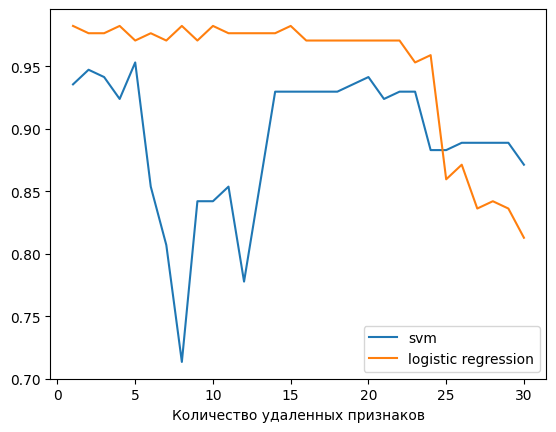

In [3]:
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

features = np.arange(X_train.shape[1])

x = []
y_svm = []
y_reg = []

features_svm = list(features)
features_reg = list(features)

def score_model (model, _features):
    features = np.array(sorted(_features))
    _X_train = X_train[:,features]
    _X_test = X_test[:,features]
    model.fit(_X_train, y_train)
    prediction = model.predict(_X_test)
    return accuracy_score(y_test, prediction)


for i in range(len(features)):
    model_svm = LinearSVC(random_state=123)
    y_svm.append(score_model(model_svm, features_svm))

    model_reg = LogisticRegression(max_iter=(int)(5e2))
    y_reg.append(score_model(model_reg, features_reg))

    x.append(i + 1)

    worst_feature_svm = -1
    score_svm = 0.0

    worst_feature_reg = -1
    score_reg = 0.0

    for v in features:
        if not v in features_svm:
            continue
        _features = features_svm.copy()
        _features.append(v)
        model = LinearSVC(random_state=123)
        score = score_model(model, _features)

        if worst_feature_svm == -1 or score_svm > score:
            worst_feature_svm = v
            score_svm = score

    for v in features:
        if not v in features_reg:
            continue
        _features = features_reg.copy()
        _features.append(v)
        model = LogisticRegression(max_iter=(int)(5e2))
        score = score_model(model, _features)

        if worst_feature_reg == -1 or score_reg > score:
            worst_feature_reg = v
            score_reg = score

    features_reg.remove(worst_feature_reg)
    features_svm.remove(worst_feature_svm)

    clear_output(True)
    plt.plot(x, y_svm, label="svm")
    plt.plot(x, y_reg, label="logistic regression")
    plt.xlabel("Количество удаленных признаков")

    plt.legend()

    plt.show()

# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

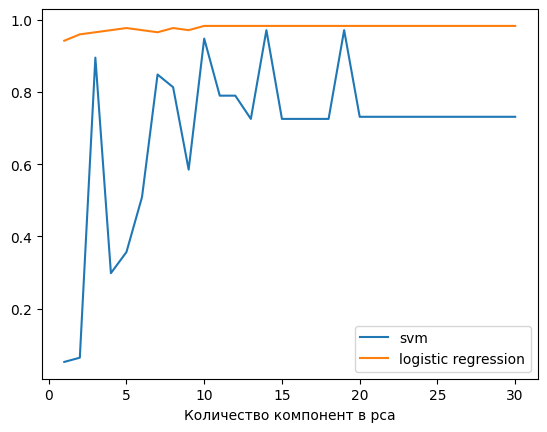

In [4]:
plt.cla()
# pca = decomposition.PCA(n_components=#check different number of reduced components

x = []
y_svm = []
y_reg = []

def score_model (model, X_train, X_test, y_train, y_test):
    features = np.array(sorted(_features))
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    return accuracy_score(y_test, prediction)

for number_of_features in range(1, len(features) + 1):
    pca = decomposition.PCA(n_components=number_of_features)
    
    _X = X
    _X = pca.fit_transform(_X)
    X_train, X_test, y_train, y_test = train_test_split(_X, y, test_size=0.3, random_state=5)

    model_svm = LinearSVC(random_state=69)
    model_reg = LogisticRegression(max_iter=(int)(5e2))

    x.append(number_of_features)
    y_svm.append(score_model(model_svm, X_train, X_test, y_train, y_test))
    y_reg.append(score_model(model_reg, X_train, X_test, y_train, y_test))


    clear_output(True)
    plt.plot(x, y_svm, label="svm")
    plt.plot(x, y_reg, label="logistic regression")
    plt.xlabel("Количество компонент в pca")

    plt.legend()

    plt.show()

#  Выводы (1pts)


### Forward selection
При использовании forward selection наилучший score показала svm при добавлении 7 - 17 признаков. При возрастании количества признаков точность логистической регрессии примерно возрастает. Тогда как точность svm сначала возрастает, а потом убывает. Но при этом лучший score у моделей достаточно высокий : 0.98 - 0.99.

### Backward elimination

При использовании backward elimination точность логистической регрессии примерно убывает, причем интересно, что наилучшая точность достигается при удалении не очень большого количества признаков. График svm вообще колбасит)). Сначала резкое снижение точности за 8 итераций с 0.93 до 0.75, потом резко возрастает и в конце снижение точности. Это очень странно, вероятно для svm backward elimination не лучший способ сократить размерность.

### PCA

При использовании PCA точность логистической регрессии возрастает от кол-ва компонент, и наилучший score она показывает при 10-30 компонент. Точность svm очень сильно прыгает от количества компонент : от 0.1 до 0.95. Здесь логистическая регрессия показывает score лучше чем svm. 

### Мини-вывод

Для svm лучшим способом сокращения размерности оказалось forward selection, а для логистической регрессии - forward selection и PCA.

Видимо для каждой модели нужно индивидуально экспериментальным путем подбирать наилучшие размерности и способы сокращения размерностей :). То есть наилучший способ сокращения размерности зависит от задачи и выбранной для нее модели. 